# 3 MODEL STACK

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2024-07-04 18:16:22.627730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 18:16:22.627837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 18:16:22.751345: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [2]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr
import os

In [4]:
data_dir='/kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset'

In [5]:
image_exts=['jpeg','jpg','bmp','png']

In [6]:
for image_class in os.listdir(data_dir):
  print(image_class)

Square Stalked Vine_Sarcostemma acidum
Nagadali_Ruta graveolens
Palak(Spinach)-Spinacia oleracea
Panicled Foldwing_Dicliptera paniculata
Tecoma
Spiderwisp_Cleome viscosa
Celery_Apium graveolens
Small Water Clover_Marsilea minuta
Stinking Passionflower_Passiflora foetida
Indian CopperLeaf_ Acalypha indica
Brahmi-Bacopa monnieri
Coriander-Coriandrum sativum
Honge-Milletia
Pepper-Piper nigrum
Indian Thornapple_Datura metel
Indian Sarsaparilla_Hemidesmus indicus
Gasagase-Grewia asiatica
Pumpkin-Cucurbita pepo
Purple Fruited Pea Eggplant_Solanum trilobatum
Malabar_Spinach-Basella alba
Geranium_ Pelargonium spp. (Genus)
Rose Apple_Syzygium jambos
Lantana- Lantana camara
Amaranthus Green_Amaranthus viridis
Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)
Velvet bean_Mucuna pruriens
Eucalyptus-Eucalyptus spp. (Genus)
Arive_Dantu_Amaranthus viridis
Castor-Ricinus communis
Bringaraja-Eclipta prostrata
Seethaashoka-Saraca asoca
Fenugreek Leaves_ Trigonella foenum-graecum
Giant Pigweed_Amaranthu

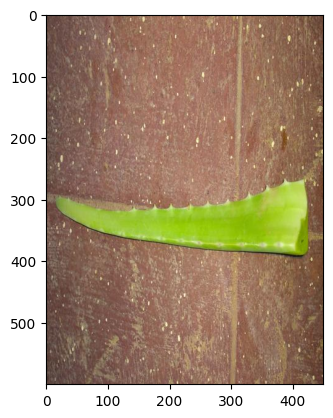

In [7]:
from matplotlib import pyplot as plt
image_path ='/kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Aloevera-Aloe barbadensis/10.jpg' # Replace with your actual path

# Read the image
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Data Cleaning

In [8]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path= os.path.join(data_dir, image_class, image)
    try:
      img= cv2.imread(image_path)
      tip= imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

Image not in ext list /kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Sapota-Manikara zapota/VID_20190921_120806.mp4
Issue with image /kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Sapota-Manikara zapota/VID_20190921_120806.mp4
Image not in ext list /kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Spinach1/VID_20190917_104022.mp4
Issue with image /kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Spinach1/VID_20190917_104022.mp4


Corrupt JPEG data: 441 extraneous bytes before marker 0xd9


Image not in ext list /kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Spinach1/VID_20190917_103758.mp4
Issue with image /kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Spinach1/VID_20190917_103758.mp4
Image not in ext list /kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Spinach1/VID_20190917_103955.mp4
Issue with image /kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset/Spinach1/VID_20190917_103955.mp4


# Pre-processing

In [9]:
import numpy as np
data=tf.keras.utils.image_dataset_from_directory('/kaggle/input/ayurvedic-medicinal-plants-and-leaf-segments-images/all_dataset',batch_size=32)

Found 20625 files belonging to 169 classes.


In [10]:
data_iterator= data.as_numpy_iterator()
batch = data_iterator.next()
len(batch)

2

In [11]:
scaled=batch[0]/255
scaled.max()

1.0

In [12]:
data=data.map(lambda x, y: (x/255,y))
scaled_iterator=data.as_numpy_iterator()
batch=  scaled_iterator.next()

In [13]:
len(data)

645

In [14]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [15]:
train_size+val_size+test_size

646

In [16]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)
len(test)

64

In [17]:
def extract_features_labels(dataset):
    features = []
    labels = []
    for images, lbls in dataset:
        features.append(images.numpy())
        labels.append(lbls.numpy())
    return np.concatenate(features), np.concatenate(labels)

# Extract features and labels for train, validation, and test sets
train_features, train_labels = extract_features_labels(train)
val_features, val_labels = extract_features_labels(val)
test_features, test_labels = extract_features_labels(test)

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


In [18]:
len(test)

64

In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                            patience=5,          # Number of epochs with no improvement after which training will be stopped
                            restore_best_weights=True) 

# MobileNetV2

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

def mobilenetv2(input_shape=(224, 224, 3), num_classes=169, alpha=1.0):
    model = Sequential()

    # Initial Convolution Layer
    model.add(Conv2D(filters=int(32 * alpha), kernel_size=(3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Depthwise Separable Convolution Blocks
    model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=int(64 * alpha), kernel_size=(1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=int(128 * alpha), kernel_size=(1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=int(128 * alpha), kernel_size=(1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=int(256 * alpha), kernel_size=(1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Global Average Pooling
    model.add(GlobalAveragePooling2D())

    # Output Layer
    model.add(Dense(units=num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)

# Compile the model with the optimizer
    model.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

    
    return model


In [22]:
mobilenetv2_model = mobilenetv2()

# Print the model summary
mobilenetv2_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 112, 112, 32)   │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 56, 56, 64)     │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 56, 56, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 111,657 (436.16 KB)

 Trainable params: 109,737 (428.66 KB)

 Non-trainable params: 1,920 (7.50 KB)

# DenseNet

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model

In [24]:
def conv_block(x, growth_rate):
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=growth_rate, kernel_size=(3, 3), padding='same')(x)
    return x

def dense_block(x, layers, growth_rate):
    for _ in range(layers):
        conv = conv_block(x, growth_rate)
        x = Concatenate()([x, conv])
    return x

def transition_block(x, compression_factor):
    num_channels = int(x.shape[-1] * compression_factor)
    x = BatchNormalization()(x)
    x = Conv2D(filters=num_channels, kernel_size=(1, 1), padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    return x

def DenseNet121(input_shape= (256, 256, 3), num_classes=169):
    growth_rate=32
    num_layers=[6, 12, 24, 16] 
    compression_factor=0.5
    inputs = Input(shape=input_shape)
    
    # Initial Convolutional Layer
    x = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    # Dense Blocks
    for i, layers in enumerate(num_layers):
        x = dense_block(x, layers, growth_rate)
        if i < len(num_layers) - 1:
            x = transition_block(x, compression_factor)
    
    # Global Average Pooling and Output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
   
    # Create model
    model = Model(inputs, outputs, name='densenet121')
    return model


In [25]:
densenet121 = DenseNet121()

In [26]:
from tensorflow.keras.optimizers import Adam

# Define the optimizer with a learning rate of 0.001
optimizer = Adam(learning_rate=0.001)

# Compile the model with the optimizer
densenet121.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [27]:
densenet121.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ activation_9[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │     18,464 │ activation_10[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ max_pooling2d[0]… │
│ (Concatenate)       │ 96)               │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │     27,680 │ activation_11[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64, 64,    │          0 │ concatenate[0][0… │
│ (Concatenate)       │ 128)              │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │     36,896 │ activation_12[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 64, 64,    │          0 │ concatenate_1[0]

 Total params: 10,084,841 (38.47 MB)

 Trainable params: 10,018,089 (38.22 MB)

 Non-trainable params: 66,752 (260.75 KB)

# EfficientNet

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def round_filters(filters, width_coefficient, depth_divisor, min_depth):
    filters *= width_coefficient
    min_depth = min_depth or depth_divisor
    new_filters = max(min_depth, int(filters + depth_divisor / 2) // depth_divisor * depth_divisor)
    if new_filters < 0.9 * filters:
        new_filters += depth_divisor
    return int(new_filters)

def round_repeats(repeats, depth_coefficient):
    return int(tf.math.ceil(depth_coefficient * repeats))

def mb_conv_block(inputs, in_filters, out_filters, expand_ratio, strides, se_ratio, drop_rate, prefix):
    has_se = (se_ratio is not None) and (0 < se_ratio <= 1)
    bn_axis = 3
    
    # Expansion phase
    if expand_ratio != 1:
        x = layers.Conv2D(in_filters * expand_ratio, 1, padding='same', use_bias=False, name=prefix + 'expand_conv')(inputs)
        x = layers.BatchNormalization(axis=bn_axis, name=prefix + 'expand_bn')(x)
        x = layers.Activation(tf.nn.swish, name=prefix + 'expand_activation')(x)
    else:
        x = inputs

    # Depthwise Convolution
    x = layers.DepthwiseConv2D(kernel_size=3, strides=strides, padding='same', use_bias=False, name=prefix + 'dwconv')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=prefix + 'bn')(x)
    x = layers.Activation(tf.nn.swish, name=prefix + 'activation')(x)

    # Squeeze and Excitation phase
    if has_se:
        num_reduced_filters = max(1, int(in_filters * se_ratio))
        se = layers.GlobalAveragePooling2D(name=prefix + 'se_squeeze')(x)
        se = layers.Reshape((1, 1, in_filters * expand_ratio), name=prefix + 'se_reshape')(se)
        se = layers.Conv2D(num_reduced_filters, 1, activation='swish', padding='same', use_bias=True, name=prefix + 'se_reduce')(se)
        se = layers.Conv2D(in_filters * expand_ratio, 1, activation='sigmoid', padding='same', use_bias=True, name=prefix + 'se_expand')(se)
        x = layers.multiply([x, se], name=prefix + 'se_excite')

    # Output phase
    x = layers.Conv2D(out_filters, 1, padding='same', use_bias=False, name=prefix + 'project_conv')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=prefix + 'project_bn')(x)
    if strides == 1 and in_filters == out_filters:
        if drop_rate > 0:
            x = layers.Dropout(drop_rate, noise_shape=(None, 1, 1, 1), name=prefix + 'drop')(x)
        x = layers.add([x, inputs], name=prefix + 'add')
    return x

def EfficientNet(input_shape, width_coefficient, depth_coefficient, dropout_rate=0.2):
    inputs = layers.Input(shape=input_shape)
    bn_axis = 3
    depth_divisor = 8
    min_depth = None
    drop_connect_rate = 0.2
    
    x = layers.Conv2D(round_filters(32, width_coefficient, depth_divisor, min_depth), 3, strides=(2, 2), padding='same', use_bias=False, name='stem_conv')(inputs)
    x = layers.BatchNormalization(axis=bn_axis, name='stem_bn')(x)
    x = layers.Activation(tf.nn.swish, name='stem_activation')(x)
    
    # MBConv blocks
    x = mb_conv_block(x, in_filters=32, out_filters=16, expand_ratio=1, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block1a_')
    x = mb_conv_block(x, in_filters=16, out_filters=24, expand_ratio=6, strides=2, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block2a_')
    x = mb_conv_block(x, in_filters=24, out_filters=24, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block2b_')
    x = mb_conv_block(x, in_filters=24, out_filters=40, expand_ratio=6, strides=2, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block3a_')
    x = mb_conv_block(x, in_filters=40, out_filters=40, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block3b_')
    x = mb_conv_block(x, in_filters=40, out_filters=80, expand_ratio=6, strides=2, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block4a_')
    x = mb_conv_block(x, in_filters=80, out_filters=80, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block4b_')
    x = mb_conv_block(x, in_filters=80, out_filters=80, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block4c_')
    x = mb_conv_block(x, in_filters=80, out_filters=112, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block5a_')
    x = mb_conv_block(x, in_filters=112, out_filters=112, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block5b_')
    x = mb_conv_block(x, in_filters=112, out_filters=112, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block5c_')
    x = mb_conv_block(x, in_filters=112, out_filters=192, expand_ratio=6, strides=2, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block6a_')
    x = mb_conv_block(x, in_filters=192, out_filters=192, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block6b_')
    x = mb_conv_block(x, in_filters=192, out_filters=192, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block6c_')
    x = mb_conv_block(x, in_filters=192, out_filters=192, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block6d_')
    x = mb_conv_block(x, in_filters=192, out_filters=320, expand_ratio=6, strides=1, se_ratio=0.25, drop_rate=drop_connect_rate, prefix='block7a_')

    x = layers.Conv2D(round_filters(1280, width_coefficient, depth_divisor, min_depth), 1, padding='same', use_bias=False, name='top_conv')(x)
    x = layers.BatchNormalization(axis=bn_axis, name='top_bn')(x)
    x = layers.Activation(tf.nn.swish, name='top_activation')(x)
    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = layers.Dropout(dropout_rate, name='top_dropout')(x)
    x = layers.Dense(1000, activation='softmax', name='probs')(x)
    
    model = Model(inputs, x, name='efficientnet')
    return model

# Define the model
input_shape = (256, 256, 3)
width_coefficient = 1.0
depth_coefficient = 1.0
efficientnet = EfficientNet(input_shape, width_coefficient, depth_coefficient)


efficientnet.summary()


Model: "efficientnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 128, 128,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 128, 128,  │      1,536 │ block1a_project_… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 128, 128,  │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 128, 128,  │          0 │ block2a_expand_b

 Total params: 5,229,188 (19.95 MB)

 Trainable params: 5,187,172 (19.79 MB)

 Non-trainable params: 42,016 (164.12 KB)

In [29]:
from tensorflow.keras.optimizers import Adam

# Define the optimizer with a learning rate of 0.001
optimizer = Adam(learning_rate=0.001)

# Compile the model with the optimizer
efficientnet.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Training

In [30]:
history_1 = mobilenetv2_model.fit(train, epochs=110, verbose=1,  
                    callbacks=[early_stopping])

Epoch 1/110
  2/451 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - accuracy: 0.0000e+00 - loss: 5.1480   

I0000 00:00:1720118012.981391      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


270/451 ━━━━━━━━━━━━━━━━━━━━ 44s 248ms/step - accuracy: 0.0555 - loss: 4.5601

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 249ms/step - accuracy: 0.0734 - loss: 4.3473
Epoch 2/110


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


260/451 ━━━━━━━━━━━━━━━━━━━━ 42s 222ms/step - accuracy: 0.2267 - loss: 3.1702

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 103s 227ms/step - accuracy: 0.2361 - loss: 3.1144
Epoch 3/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - accuracy: 0.3361 - loss: 2.6277

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.3398 - loss: 2.6037
Epoch 4/110
261/451 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.4064 - loss: 2.3054

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.4092 - loss: 2.2937
Epoch 5/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 0.4599 - loss: 2.0473

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.4575 - loss: 2.0557
Epoch 6/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.5029 - loss: 1.9017

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.4996 - loss: 1.8978
Epoch 7/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.5302 - loss: 1.7446

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 193ms/step - accuracy: 0.5317 - loss: 1.7407
Epoch 8/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 35s 187ms/step - accuracy: 0.5587 - loss: 1.6170

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.5584 - loss: 1.6179
Epoch 9/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.5932 - loss: 1.5125

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 192ms/step - accuracy: 0.5898 - loss: 1.5169
Epoch 10/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 37s 196ms/step - accuracy: 0.6189 - loss: 1.4000

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.6167 - loss: 1.4042
Epoch 11/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 42s 223ms/step - accuracy: 0.6380 - loss: 1.3088

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.6341 - loss: 1.3222
Epoch 12/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.6495 - loss: 1.2498

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 132s 187ms/step - accuracy: 0.6483 - loss: 1.2580
Epoch 13/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - accuracy: 0.6721 - loss: 1.1617

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 193ms/step - accuracy: 0.6664 - loss: 1.1812
Epoch 14/110
268/451 ━━━━━━━━━━━━━━━━━━━━ 34s 188ms/step - accuracy: 0.6746 - loss: 1.1206

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.6740 - loss: 1.1295
Epoch 15/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 36s 190ms/step - accuracy: 0.7045 - loss: 1.0415

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 192ms/step - accuracy: 0.7005 - loss: 1.0571
Epoch 16/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 37s 189ms/step - accuracy: 0.6972 - loss: 1.0406

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.6983 - loss: 1.0430
Epoch 17/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 38s 193ms/step - accuracy: 0.7291 - loss: 0.9495

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 194ms/step - accuracy: 0.7250 - loss: 0.9665
Epoch 18/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.7331 - loss: 0.9252

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.7330 - loss: 0.9332
Epoch 19/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step - accuracy: 0.7418 - loss: 0.8861

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.7416 - loss: 0.8960
Epoch 20/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 37s 187ms/step - accuracy: 0.7536 - loss: 0.8411

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.7524 - loss: 0.8510
Epoch 21/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.7610 - loss: 0.8043

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 144s 195ms/step - accuracy: 0.7592 - loss: 0.8160
Epoch 22/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.7733 - loss: 0.7979

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 141s 192ms/step - accuracy: 0.7687 - loss: 0.8092
Epoch 23/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step - accuracy: 0.7814 - loss: 0.7512

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 141s 191ms/step - accuracy: 0.7791 - loss: 0.7592
Epoch 24/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.7753 - loss: 0.7399

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.7747 - loss: 0.7506
Epoch 25/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 38s 193ms/step - accuracy: 0.7897 - loss: 0.7216

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 141s 193ms/step - accuracy: 0.7877 - loss: 0.7246
Epoch 26/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 35s 187ms/step - accuracy: 0.7925 - loss: 0.6936

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.7911 - loss: 0.7040
Epoch 27/110
266/451 ━━━━━━━━━━━━━━━━━━━━ 34s 189ms/step - accuracy: 0.8007 - loss: 0.6678

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 194ms/step - accuracy: 0.8000 - loss: 0.6727
Epoch 28/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 0.8183 - loss: 0.6330

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.8139 - loss: 0.6428
Epoch 29/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.8160 - loss: 0.6101

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 194ms/step - accuracy: 0.8125 - loss: 0.6230
Epoch 30/110
265/451 ━━━━━━━━━━━━━━━━━━━━ 35s 189ms/step - accuracy: 0.8315 - loss: 0.5644

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 189ms/step - accuracy: 0.8285 - loss: 0.5783
Epoch 31/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - accuracy: 0.8183 - loss: 0.5973

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.8173 - loss: 0.6001
Epoch 32/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 35s 188ms/step - accuracy: 0.8434 - loss: 0.5565

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.8402 - loss: 0.5645
Epoch 33/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.8423 - loss: 0.5372

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 191ms/step - accuracy: 0.8373 - loss: 0.5509
Epoch 34/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.8443 - loss: 0.5274

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.8403 - loss: 0.5360
Epoch 35/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - accuracy: 0.8525 - loss: 0.5006

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.8487 - loss: 0.5087
Epoch 36/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.8575 - loss: 0.4863

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 193ms/step - accuracy: 0.8538 - loss: 0.4997
Epoch 37/110
275/451 ━━━━━━━━━━━━━━━━━━━━ 32s 184ms/step - accuracy: 0.8544 - loss: 0.4860

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 84s 185ms/step - accuracy: 0.8524 - loss: 0.4915
Epoch 38/110
266/451 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.8588 - loss: 0.4547

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 186ms/step - accuracy: 0.8550 - loss: 0.4668
Epoch 39/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.8647 - loss: 0.4422

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 144s 190ms/step - accuracy: 0.8623 - loss: 0.4507
Epoch 40/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.8687 - loss: 0.4388

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.8646 - loss: 0.4510
Epoch 41/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 38s 191ms/step - accuracy: 0.8720 - loss: 0.4296

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 193ms/step - accuracy: 0.8703 - loss: 0.4377
Epoch 42/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.8746 - loss: 0.4205

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 194ms/step - accuracy: 0.8713 - loss: 0.4300
Epoch 43/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.8744 - loss: 0.4173

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.8726 - loss: 0.4223
Epoch 44/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.8828 - loss: 0.3936

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 84s 187ms/step - accuracy: 0.8803 - loss: 0.4007
Epoch 45/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.8847 - loss: 0.3832

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.8837 - loss: 0.3887
Epoch 46/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 35s 185ms/step - accuracy: 0.8850 - loss: 0.3782

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 141s 189ms/step - accuracy: 0.8849 - loss: 0.3802
Epoch 47/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.8794 - loss: 0.3889

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.8817 - loss: 0.3850
Epoch 48/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.8884 - loss: 0.3743

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.8886 - loss: 0.3735
Epoch 49/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.8882 - loss: 0.3463

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 193ms/step - accuracy: 0.8887 - loss: 0.3501
Epoch 50/110
273/451 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.8923 - loss: 0.3458

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 198ms/step - accuracy: 0.8899 - loss: 0.3513
Epoch 51/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 36s 185ms/step - accuracy: 0.8876 - loss: 0.3564

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 83s 184ms/step - accuracy: 0.8872 - loss: 0.3598
Epoch 52/110
261/451 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - accuracy: 0.8971 - loss: 0.3456

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 148s 197ms/step - accuracy: 0.8947 - loss: 0.3481
Epoch 53/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 37s 186ms/step - accuracy: 0.9080 - loss: 0.3094

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 192ms/step - accuracy: 0.9060 - loss: 0.3137
Epoch 54/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.9027 - loss: 0.3152

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 194ms/step - accuracy: 0.8991 - loss: 0.3255
Epoch 55/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 36s 192ms/step - accuracy: 0.9086 - loss: 0.2940

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.9078 - loss: 0.3010
Epoch 56/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.9007 - loss: 0.3056

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 192ms/step - accuracy: 0.8993 - loss: 0.3143
Epoch 57/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.9052 - loss: 0.3017

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 144s 196ms/step - accuracy: 0.9043 - loss: 0.3071
Epoch 58/110
267/451 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.9169 - loss: 0.2734

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.9137 - loss: 0.2813
Epoch 59/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.9027 - loss: 0.3074

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.9040 - loss: 0.3052
Epoch 60/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.9183 - loss: 0.2564

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.9168 - loss: 0.2635
Epoch 61/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 38s 196ms/step - accuracy: 0.9208 - loss: 0.2667

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.9189 - loss: 0.2715
Epoch 62/110
264/451 ━━━━━━━━━━━━━━━━━━━━ 36s 195ms/step - accuracy: 0.9137 - loss: 0.2823

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 195ms/step - accuracy: 0.9136 - loss: 0.2824
Epoch 63/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.9192 - loss: 0.2632

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.9176 - loss: 0.2710
Epoch 64/110
265/451 ━━━━━━━━━━━━━━━━━━━━ 35s 189ms/step - accuracy: 0.9185 - loss: 0.2495

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 193ms/step - accuracy: 0.9192 - loss: 0.2516
Epoch 65/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 0.9255 - loss: 0.2393

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.9233 - loss: 0.2477
Epoch 66/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - accuracy: 0.9306 - loss: 0.2325

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 194ms/step - accuracy: 0.9280 - loss: 0.2379
Epoch 67/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 38s 196ms/step - accuracy: 0.9214 - loss: 0.2508

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 90s 199ms/step - accuracy: 0.9209 - loss: 0.2530
Epoch 68/110
261/451 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.9234 - loss: 0.2392

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 94s 208ms/step - accuracy: 0.9223 - loss: 0.2439
Epoch 69/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 40s 204ms/step - accuracy: 0.9185 - loss: 0.2459

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 139s 201ms/step - accuracy: 0.9214 - loss: 0.2430
Epoch 70/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.9307 - loss: 0.2333

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 138s 193ms/step - accuracy: 0.9288 - loss: 0.2381
Epoch 71/110
271/451 ━━━━━━━━━━━━━━━━━━━━ 34s 190ms/step - accuracy: 0.9310 - loss: 0.2394

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.9302 - loss: 0.2380
Epoch 72/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.9390 - loss: 0.1975

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 198ms/step - accuracy: 0.9369 - loss: 0.2042
Epoch 73/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.9267 - loss: 0.2404

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 198ms/step - accuracy: 0.9264 - loss: 0.2401
Epoch 74/110
265/451 ━━━━━━━━━━━━━━━━━━━━ 36s 196ms/step - accuracy: 0.9358 - loss: 0.2129

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 141s 197ms/step - accuracy: 0.9338 - loss: 0.2173
Epoch 75/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.9311 - loss: 0.2135

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 92s 203ms/step - accuracy: 0.9288 - loss: 0.2194
Epoch 76/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step - accuracy: 0.9442 - loss: 0.1913

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.9409 - loss: 0.2001
Epoch 77/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.9367 - loss: 0.2088

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 192ms/step - accuracy: 0.9347 - loss: 0.2145
Epoch 78/110
267/451 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.9392 - loss: 0.1979

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 196ms/step - accuracy: 0.9380 - loss: 0.2012
Epoch 79/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9403 - loss: 0.1994

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 91s 203ms/step - accuracy: 0.9403 - loss: 0.1980
Epoch 80/110
264/451 ━━━━━━━━━━━━━━━━━━━━ 35s 190ms/step - accuracy: 0.9371 - loss: 0.1857

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 87s 194ms/step - accuracy: 0.9379 - loss: 0.1901
Epoch 81/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - accuracy: 0.9405 - loss: 0.1856

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.9381 - loss: 0.1931
Epoch 82/110
267/451 ━━━━━━━━━━━━━━━━━━━━ 34s 188ms/step - accuracy: 0.9331 - loss: 0.2115

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.9348 - loss: 0.2066
Epoch 83/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step - accuracy: 0.9535 - loss: 0.1624

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.9525 - loss: 0.1640
Epoch 84/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - accuracy: 0.9448 - loss: 0.1815

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 197ms/step - accuracy: 0.9438 - loss: 0.1861
Epoch 85/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.9454 - loss: 0.1686

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 197ms/step - accuracy: 0.9429 - loss: 0.1784
Epoch 86/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 36s 195ms/step - accuracy: 0.9483 - loss: 0.1669

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.9482 - loss: 0.1682
Epoch 87/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.9460 - loss: 0.1781

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 196ms/step - accuracy: 0.9456 - loss: 0.1776
Epoch 88/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 36s 185ms/step - accuracy: 0.9468 - loss: 0.1721

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.9475 - loss: 0.1723
Epoch 89/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.9438 - loss: 0.1707

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.9441 - loss: 0.1719
Epoch 90/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.9477 - loss: 0.1720

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 144s 198ms/step - accuracy: 0.9463 - loss: 0.1755
Epoch 91/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.9493 - loss: 0.1568

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.9489 - loss: 0.1601
Epoch 92/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.9557 - loss: 0.1557

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 145s 200ms/step - accuracy: 0.9543 - loss: 0.1594
Epoch 93/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - accuracy: 0.9480 - loss: 0.1679

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 200ms/step - accuracy: 0.9480 - loss: 0.1691
Epoch 94/110
273/451 ━━━━━━━━━━━━━━━━━━━━ 33s 189ms/step - accuracy: 0.9441 - loss: 0.1760

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 139s 195ms/step - accuracy: 0.9458 - loss: 0.1714
Epoch 95/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 38s 193ms/step - accuracy: 0.9505 - loss: 0.1601

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.9506 - loss: 0.1616
Epoch 96/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 36s 193ms/step - accuracy: 0.9498 - loss: 0.1595

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 195ms/step - accuracy: 0.9500 - loss: 0.1595
Epoch 97/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 39s 203ms/step - accuracy: 0.9577 - loss: 0.1451

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 145s 201ms/step - accuracy: 0.9564 - loss: 0.1487
Epoch 98/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - accuracy: 0.9494 - loss: 0.1594

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 141s 198ms/step - accuracy: 0.9478 - loss: 0.1659
Epoch 99/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.9541 - loss: 0.1449

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.9555 - loss: 0.1442
Epoch 100/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.9567 - loss: 0.1412

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.9559 - loss: 0.1451
Epoch 101/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.9633 - loss: 0.1278

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.9603 - loss: 0.1373
Epoch 102/110
266/451 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - accuracy: 0.9586 - loss: 0.1358

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 153s 220ms/step - accuracy: 0.9566 - loss: 0.1415
Epoch 103/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.9491 - loss: 0.1557

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 90s 199ms/step - accuracy: 0.9514 - loss: 0.1518
Epoch 104/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.9586 - loss: 0.1307

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 90s 199ms/step - accuracy: 0.9572 - loss: 0.1354
Epoch 105/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.9560 - loss: 0.1437

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.9548 - loss: 0.1465
Epoch 106/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 37s 200ms/step - accuracy: 0.9561 - loss: 0.1424

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 145s 203ms/step - accuracy: 0.9570 - loss: 0.1403
Epoch 107/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 38s 198ms/step - accuracy: 0.9575 - loss: 0.1350

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.9559 - loss: 0.1401
Epoch 108/110
266/451 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.9567 - loss: 0.1320

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 93s 205ms/step - accuracy: 0.9579 - loss: 0.1302
Epoch 109/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 38s 192ms/step - accuracy: 0.9583 - loss: 0.1295

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.9570 - loss: 0.1347
Epoch 110/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - accuracy: 0.9565 - loss: 0.1345

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 92s 204ms/step - accuracy: 0.9549 - loss: 0.1410


In [31]:
history_2 = densenet121.fit(train, epochs=110, verbose=1,  
                    callbacks=[early_stopping])

Epoch 1/110


W0000 00:00:1720129730.246457      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


254/451 ━━━━━━━━━━━━━━━━━━━━ 1:03 324ms/step - accuracy: 0.0357 - loss: 6.8980

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 301s 319ms/step - accuracy: 0.0510 - loss: 6.1116
Epoch 2/110
248/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 301ms/step - accuracy: 0.1772 - loss: 3.6711

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.1873 - loss: 3.5726
Epoch 3/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 1:05 330ms/step - accuracy: 0.2801 - loss: 2.9713

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 144s 318ms/step - accuracy: 0.2925 - loss: 2.9077
Epoch 4/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 59s 302ms/step - accuracy: 0.3744 - loss: 2.4264 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 302ms/step - accuracy: 0.3815 - loss: 2.3988
Epoch 5/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 58s 302ms/step - accuracy: 0.4428 - loss: 2.1327

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 302ms/step - accuracy: 0.4473 - loss: 2.1145
Epoch 6/110
261/451 ━━━━━━━━━━━━━━━━━━━━ 57s 300ms/step - accuracy: 0.5172 - loss: 1.7998

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.5182 - loss: 1.8095
Epoch 7/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 300ms/step - accuracy: 0.5553 - loss: 1.7077

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.5545 - loss: 1.7072
Epoch 8/110
250/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 301ms/step - accuracy: 0.6183 - loss: 1.4516

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 302ms/step - accuracy: 0.6198 - loss: 1.4281
Epoch 9/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 301ms/step - accuracy: 0.6573 - loss: 1.2621

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.6553 - loss: 1.2711
Epoch 10/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 59s 301ms/step - accuracy: 0.6838 - loss: 1.1810

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.6840 - loss: 1.1840
Epoch 11/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 57s 303ms/step - accuracy: 0.6616 - loss: 1.3043

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 137s 303ms/step - accuracy: 0.6804 - loss: 1.2184
Epoch 12/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 300ms/step - accuracy: 0.7492 - loss: 0.8950

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.7484 - loss: 0.8977
Epoch 13/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.7496 - loss: 0.9244

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.7454 - loss: 0.9505
Epoch 14/110
268/451 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.7729 - loss: 0.8319

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.7784 - loss: 0.8104
Epoch 15/110
244/451 ━━━━━━━━━━━━━━━━━━━━ 1:02 301ms/step - accuracy: 0.8006 - loss: 0.7035

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.8020 - loss: 0.6987
Epoch 16/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.8372 - loss: 0.5880

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.8327 - loss: 0.6083
Epoch 17/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 58s 300ms/step - accuracy: 0.8334 - loss: 0.6371

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.8352 - loss: 0.6130
Epoch 18/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 56s 300ms/step - accuracy: 0.8276 - loss: 0.6397

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.8323 - loss: 0.6218
Epoch 19/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 300ms/step - accuracy: 0.8472 - loss: 0.5593

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.8516 - loss: 0.5386
Epoch 20/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 301ms/step - accuracy: 0.8694 - loss: 0.4499

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.8673 - loss: 0.4692
Epoch 21/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.8583 - loss: 0.5708

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.8641 - loss: 0.5326
Epoch 22/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.8690 - loss: 0.4858

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.8764 - loss: 0.4572
Epoch 23/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 57s 299ms/step - accuracy: 0.8481 - loss: 0.5748

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 299ms/step - accuracy: 0.8546 - loss: 0.5470
Epoch 24/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.8887 - loss: 0.4221 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.8940 - loss: 0.4006
Epoch 25/110
250/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 300ms/step - accuracy: 0.9048 - loss: 0.3901

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 300ms/step - accuracy: 0.9012 - loss: 0.3996
Epoch 26/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 57s 299ms/step - accuracy: 0.9039 - loss: 0.3721

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9076 - loss: 0.3596
Epoch 27/110
248/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 301ms/step - accuracy: 0.9108 - loss: 0.3752

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9106 - loss: 0.3571
Epoch 28/110
287/451 ━━━━━━━━━━━━━━━━━━━━ 48s 298ms/step - accuracy: 0.9245 - loss: 0.2801

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9230 - loss: 0.2907
Epoch 29/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.9303 - loss: 0.2574 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9311 - loss: 0.2565
Epoch 30/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 58s 299ms/step - accuracy: 0.9238 - loss: 0.2586

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9262 - loss: 0.2574
Epoch 31/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 58s 301ms/step - accuracy: 0.9079 - loss: 0.3661

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9070 - loss: 0.3735
Epoch 32/110
249/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 302ms/step - accuracy: 0.9224 - loss: 0.2928

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.9227 - loss: 0.3003
Epoch 33/110
268/451 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.9272 - loss: 0.2797

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 141s 299ms/step - accuracy: 0.9319 - loss: 0.2631
Epoch 34/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9317 - loss: 0.2770

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9332 - loss: 0.2628
Epoch 35/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 58s 300ms/step - accuracy: 0.9402 - loss: 0.2363

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 300ms/step - accuracy: 0.9367 - loss: 0.2681
Epoch 36/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9356 - loss: 0.2450

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9347 - loss: 0.2474
Epoch 37/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 58s 302ms/step - accuracy: 0.9386 - loss: 0.2618

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 144s 302ms/step - accuracy: 0.9403 - loss: 0.2501
Epoch 38/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 300ms/step - accuracy: 0.9291 - loss: 0.3324

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.9184 - loss: 0.3892
Epoch 39/110
248/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 299ms/step - accuracy: 0.9378 - loss: 0.2379

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9387 - loss: 0.2467
Epoch 40/110
286/451 ━━━━━━━━━━━━━━━━━━━━ 49s 299ms/step - accuracy: 0.9375 - loss: 0.2786

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 298ms/step - accuracy: 0.9416 - loss: 0.2616
Epoch 41/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 300ms/step - accuracy: 0.9458 - loss: 0.2476

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 300ms/step - accuracy: 0.9484 - loss: 0.2303
Epoch 42/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9596 - loss: 0.1896

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9575 - loss: 0.1906
Epoch 43/110
261/451 ━━━━━━━━━━━━━━━━━━━━ 56s 299ms/step - accuracy: 0.9523 - loss: 0.1926

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 299ms/step - accuracy: 0.9546 - loss: 0.1801
Epoch 44/110
250/451 ━━━━━━━━━━━━━━━━━━━━ 59s 298ms/step - accuracy: 0.9602 - loss: 0.1413 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9607 - loss: 0.1394
Epoch 45/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.9372 - loss: 0.2828

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9398 - loss: 0.2692
Epoch 46/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.9517 - loss: 0.2331

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9489 - loss: 0.2336
Epoch 47/110
249/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 300ms/step - accuracy: 0.9499 - loss: 0.2156

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9492 - loss: 0.2219
Epoch 48/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9563 - loss: 0.1925 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9564 - loss: 0.1901
Epoch 49/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 300ms/step - accuracy: 0.9456 - loss: 0.2389

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9492 - loss: 0.2226
Epoch 50/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 58s 300ms/step - accuracy: 0.9653 - loss: 0.1459

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9613 - loss: 0.1744
Epoch 51/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.9468 - loss: 0.2967 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9448 - loss: 0.2925
Epoch 52/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 300ms/step - accuracy: 0.9610 - loss: 0.1796

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9634 - loss: 0.1640
Epoch 53/110
248/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 299ms/step - accuracy: 0.9739 - loss: 0.1163

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9706 - loss: 0.1336
Epoch 54/110
243/451 ━━━━━━━━━━━━━━━━━━━━ 1:02 300ms/step - accuracy: 0.9563 - loss: 0.2411

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9585 - loss: 0.2199
Epoch 55/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.9503 - loss: 0.2126

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9525 - loss: 0.2065
Epoch 56/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 58s 299ms/step - accuracy: 0.9480 - loss: 0.2655

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9511 - loss: 0.2403
Epoch 57/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.9570 - loss: 0.1892

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.9596 - loss: 0.1843
Epoch 58/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 58s 305ms/step - accuracy: 0.9693 - loss: 0.1569

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 137s 302ms/step - accuracy: 0.9690 - loss: 0.1453
Epoch 59/110
275/451 ━━━━━━━━━━━━━━━━━━━━ 52s 299ms/step - accuracy: 0.9642 - loss: 0.1694

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 140s 299ms/step - accuracy: 0.9646 - loss: 0.1651
Epoch 60/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 298ms/step - accuracy: 0.9521 - loss: 0.2132

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9522 - loss: 0.2153
Epoch 61/110
261/451 ━━━━━━━━━━━━━━━━━━━━ 57s 302ms/step - accuracy: 0.9625 - loss: 0.2207

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.9628 - loss: 0.2022
Epoch 62/110
248/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 299ms/step - accuracy: 0.9765 - loss: 0.0940

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9740 - loss: 0.1143
Epoch 63/110
245/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.9516 - loss: 0.2203

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9544 - loss: 0.2155
Epoch 64/110
248/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 298ms/step - accuracy: 0.9553 - loss: 0.2212

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9593 - loss: 0.2058
Epoch 65/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 1:02 323ms/step - accuracy: 0.9669 - loss: 0.1643

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 141s 312ms/step - accuracy: 0.9693 - loss: 0.1537
Epoch 66/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 300ms/step - accuracy: 0.9713 - loss: 0.1447

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9696 - loss: 0.1547
Epoch 67/110
250/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 300ms/step - accuracy: 0.9655 - loss: 0.1701

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9643 - loss: 0.1768
Epoch 68/110
243/451 ━━━━━━━━━━━━━━━━━━━━ 1:02 299ms/step - accuracy: 0.9730 - loss: 0.1164

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 299ms/step - accuracy: 0.9714 - loss: 0.1245
Epoch 69/110
244/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 298ms/step - accuracy: 0.9557 - loss: 0.2416

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9579 - loss: 0.2210
Epoch 70/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 298ms/step - accuracy: 0.9632 - loss: 0.1684

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9643 - loss: 0.1684
Epoch 71/110
245/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 298ms/step - accuracy: 0.9711 - loss: 0.1249

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9716 - loss: 0.1307
Epoch 72/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 58s 299ms/step - accuracy: 0.9800 - loss: 0.0873

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9794 - loss: 0.0909
Epoch 73/110
243/451 ━━━━━━━━━━━━━━━━━━━━ 1:02 302ms/step - accuracy: 0.9715 - loss: 0.1440

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.9688 - loss: 0.1533
Epoch 74/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 298ms/step - accuracy: 0.9664 - loss: 0.1875

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9638 - loss: 0.1969
Epoch 75/110
250/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 300ms/step - accuracy: 0.9611 - loss: 0.2451

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.9632 - loss: 0.2246
Epoch 76/110
264/451 ━━━━━━━━━━━━━━━━━━━━ 55s 298ms/step - accuracy: 0.9726 - loss: 0.1466

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9731 - loss: 0.1455
Epoch 77/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.9714 - loss: 0.1319

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 300ms/step - accuracy: 0.9731 - loss: 0.1280
Epoch 78/110
245/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 298ms/step - accuracy: 0.9788 - loss: 0.1047

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9770 - loss: 0.1197
Epoch 79/110
244/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.9660 - loss: 0.1876

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9668 - loss: 0.1827
Epoch 80/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:05 320ms/step - accuracy: 0.9779 - loss: 0.1068

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 140s 310ms/step - accuracy: 0.9762 - loss: 0.1190
Epoch 81/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.9774 - loss: 0.1186

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 137s 299ms/step - accuracy: 0.9767 - loss: 0.1278
Epoch 82/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 58s 301ms/step - accuracy: 0.9788 - loss: 0.1047

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9780 - loss: 0.1055
Epoch 83/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.9728 - loss: 0.1157 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 299ms/step - accuracy: 0.9725 - loss: 0.1200
Epoch 84/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.9715 - loss: 0.1630

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 299ms/step - accuracy: 0.9728 - loss: 0.1503
Epoch 85/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 301ms/step - accuracy: 0.9887 - loss: 0.0521

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.9851 - loss: 0.0715
Epoch 86/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 59s 301ms/step - accuracy: 0.9745 - loss: 0.1209 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 136s 301ms/step - accuracy: 0.9748 - loss: 0.1179
Epoch 87/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.9680 - loss: 0.1628

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.9665 - loss: 0.1745
Epoch 88/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.9675 - loss: 0.2032

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9702 - loss: 0.1795
Epoch 89/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.9612 - loss: 0.2550

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9667 - loss: 0.2083
Epoch 90/110
248/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 299ms/step - accuracy: 0.9766 - loss: 0.1343

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9782 - loss: 0.1196
Epoch 91/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 299ms/step - accuracy: 0.9713 - loss: 0.1642

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 299ms/step - accuracy: 0.9705 - loss: 0.1792
Epoch 92/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.9761 - loss: 0.1287

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 297ms/step - accuracy: 0.9773 - loss: 0.1207
Epoch 93/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 58s 299ms/step - accuracy: 0.9878 - loss: 0.0499

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 148s 311ms/step - accuracy: 0.9854 - loss: 0.0670
Epoch 94/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 58s 299ms/step - accuracy: 0.9796 - loss: 0.0954

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9779 - loss: 0.1060
Epoch 95/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.9808 - loss: 0.1069

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9793 - loss: 0.1185
Epoch 96/110
250/451 ━━━━━━━━━━━━━━━━━━━━ 59s 298ms/step - accuracy: 0.9817 - loss: 0.1238 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9809 - loss: 0.1181
Epoch 97/110
246/451 ━━━━━━━━━━━━━━━━━━━━ 1:01 299ms/step - accuracy: 0.9792 - loss: 0.1244

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9784 - loss: 0.1259
Epoch 98/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 57s 298ms/step - accuracy: 0.9777 - loss: 0.1325

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9788 - loss: 0.1275
Epoch 99/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 56s 298ms/step - accuracy: 0.9697 - loss: 0.1663

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9704 - loss: 0.1604
Epoch 100/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 58s 297ms/step - accuracy: 0.9833 - loss: 0.0873

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 134s 297ms/step - accuracy: 0.9819 - loss: 0.1023
Epoch 101/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 56s 299ms/step - accuracy: 0.9812 - loss: 0.0927

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9805 - loss: 0.0985
Epoch 102/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 59s 298ms/step - accuracy: 0.9815 - loss: 0.0951

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9804 - loss: 0.1047
Epoch 103/110
247/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 299ms/step - accuracy: 0.9758 - loss: 0.1543

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.9755 - loss: 0.1470
Epoch 104/110
243/451 ━━━━━━━━━━━━━━━━━━━━ 1:02 299ms/step - accuracy: 0.9883 - loss: 0.0658

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.9872 - loss: 0.0713
Epoch 105/110
248/451 ━━━━━━━━━━━━━━━━━━━━ 1:00 298ms/step - accuracy: 0.9828 - loss: 0.1052

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 299ms/step - accuracy: 0.9830 - loss: 0.1010
Epoch 106/110
250/451 ━━━━━━━━━━━━━━━━━━━━ 59s 298ms/step - accuracy: 0.9825 - loss: 0.0797 

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9818 - loss: 0.0899
Epoch 107/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 58s 300ms/step - accuracy: 0.9640 - loss: 0.2173

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 299ms/step - accuracy: 0.9687 - loss: 0.1812
Epoch 108/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.9845 - loss: 0.0908

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 299ms/step - accuracy: 0.9839 - loss: 0.0925
Epoch 109/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 1:03 318ms/step - accuracy: 0.9779 - loss: 0.1192

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 140s 309ms/step - accuracy: 0.9771 - loss: 0.1267
Epoch 110/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 59s 298ms/step - accuracy: 0.9758 - loss: 0.1514

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 135s 298ms/step - accuracy: 0.9747 - loss: 0.1560


In [32]:
history_3 = efficientnet.fit(train, epochs=110, verbose=1,  
                    callbacks=[early_stopping])

Epoch 1/110
  1/451 ━━━━━━━━━━━━━━━━━━━━ 12:59:47 104s/step - accuracy: 0.0000e+00 - loss: 7.0360

W0000 00:00:1720144895.089327      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


257/451 ━━━━━━━━━━━━━━━━━━━━ 48s 248ms/step - accuracy: 0.0247 - loss: 5.2761

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 217s 251ms/step - accuracy: 0.0318 - loss: 4.9633
Epoch 2/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 48s 250ms/step - accuracy: 0.0897 - loss: 3.8282

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 112s 249ms/step - accuracy: 0.1047 - loss: 3.7455
Epoch 3/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 48s 254ms/step - accuracy: 0.2028 - loss: 3.0935

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 120s 266ms/step - accuracy: 0.2162 - loss: 3.0380
Epoch 4/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 51s 259ms/step - accuracy: 0.3233 - loss: 2.5749

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 118s 260ms/step - accuracy: 0.3322 - loss: 2.5317
Epoch 5/110
267/451 ━━━━━━━━━━━━━━━━━━━━ 46s 252ms/step - accuracy: 0.4271 - loss: 2.1140

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 122s 271ms/step - accuracy: 0.4318 - loss: 2.0922
Epoch 6/110
275/451 ━━━━━━━━━━━━━━━━━━━━ 43s 249ms/step - accuracy: 0.5053 - loss: 1.7991

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.5071 - loss: 1.7822
Epoch 7/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 51s 268ms/step - accuracy: 0.5624 - loss: 1.5425

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 123s 273ms/step - accuracy: 0.5674 - loss: 1.5204
Epoch 8/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 50s 268ms/step - accuracy: 0.6391 - loss: 1.2738

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 119s 263ms/step - accuracy: 0.6392 - loss: 1.2655
Epoch 9/110
267/451 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.6765 - loss: 1.0817

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 117s 259ms/step - accuracy: 0.6808 - loss: 1.0709
Epoch 10/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 49s 256ms/step - accuracy: 0.7244 - loss: 0.9068

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 253ms/step - accuracy: 0.7284 - loss: 0.8940
Epoch 11/110
265/451 ━━━━━━━━━━━━━━━━━━━━ 47s 254ms/step - accuracy: 0.7693 - loss: 0.7851

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 118s 260ms/step - accuracy: 0.7717 - loss: 0.7721
Epoch 12/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 1:24 435ms/step - accuracy: 0.7986 - loss: 0.6642

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 198s 439ms/step - accuracy: 0.7991 - loss: 0.6577
Epoch 13/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 51s 264ms/step - accuracy: 0.8385 - loss: 0.5338

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 118s 260ms/step - accuracy: 0.8365 - loss: 0.5349
Epoch 14/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 52s 266ms/step - accuracy: 0.8325 - loss: 0.5227

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 121s 269ms/step - accuracy: 0.8397 - loss: 0.5043
Epoch 15/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.8790 - loss: 0.4000

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 123s 273ms/step - accuracy: 0.8789 - loss: 0.4000
Epoch 16/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 52s 268ms/step - accuracy: 0.8958 - loss: 0.3408

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 120s 265ms/step - accuracy: 0.8955 - loss: 0.3377
Epoch 17/110
277/451 ━━━━━━━━━━━━━━━━━━━━ 45s 262ms/step - accuracy: 0.9000 - loss: 0.3226

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 118s 262ms/step - accuracy: 0.9009 - loss: 0.3203
Epoch 18/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - accuracy: 0.9098 - loss: 0.2839

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 113s 251ms/step - accuracy: 0.9097 - loss: 0.2823
Epoch 19/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 49s 258ms/step - accuracy: 0.9159 - loss: 0.2655

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 118s 262ms/step - accuracy: 0.9179 - loss: 0.2587
Epoch 20/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 50s 260ms/step - accuracy: 0.9350 - loss: 0.2020

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.9324 - loss: 0.2067
Epoch 21/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9177 - loss: 0.2521

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 256ms/step - accuracy: 0.9211 - loss: 0.2436
Epoch 22/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 49s 247ms/step - accuracy: 0.9362 - loss: 0.2012

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 252ms/step - accuracy: 0.9357 - loss: 0.2020
Epoch 23/110
266/451 ━━━━━━━━━━━━━━━━━━━━ 45s 245ms/step - accuracy: 0.9491 - loss: 0.1645

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.9497 - loss: 0.1619
Epoch 24/110
266/451 ━━━━━━━━━━━━━━━━━━━━ 49s 268ms/step - accuracy: 0.9434 - loss: 0.1800

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 122s 270ms/step - accuracy: 0.9423 - loss: 0.1823
Epoch 25/110
265/451 ━━━━━━━━━━━━━━━━━━━━ 45s 244ms/step - accuracy: 0.9484 - loss: 0.1667

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 112s 247ms/step - accuracy: 0.9477 - loss: 0.1666
Epoch 26/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 51s 264ms/step - accuracy: 0.9482 - loss: 0.1611

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 119s 262ms/step - accuracy: 0.9511 - loss: 0.1532
Epoch 27/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 49s 254ms/step - accuracy: 0.9471 - loss: 0.1699

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 253ms/step - accuracy: 0.9480 - loss: 0.1659
Epoch 28/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 53s 276ms/step - accuracy: 0.9542 - loss: 0.1408

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 120s 266ms/step - accuracy: 0.9551 - loss: 0.1392
Epoch 29/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 50s 255ms/step - accuracy: 0.9563 - loss: 0.1461

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9586 - loss: 0.1378
Epoch 30/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 47s 239ms/step - accuracy: 0.9641 - loss: 0.1048

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 112s 247ms/step - accuracy: 0.9641 - loss: 0.1069
Epoch 31/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 47s 238ms/step - accuracy: 0.9622 - loss: 0.1169

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 112s 247ms/step - accuracy: 0.9604 - loss: 0.1240
Epoch 32/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 48s 255ms/step - accuracy: 0.9624 - loss: 0.1145

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9643 - loss: 0.1099
Epoch 33/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 50s 256ms/step - accuracy: 0.9695 - loss: 0.1024

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9672 - loss: 0.1070
Epoch 34/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9674 - loss: 0.1025

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 113s 250ms/step - accuracy: 0.9663 - loss: 0.1066
Epoch 35/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 47s 253ms/step - accuracy: 0.9649 - loss: 0.1103

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 255ms/step - accuracy: 0.9655 - loss: 0.1085
Epoch 36/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 48s 244ms/step - accuracy: 0.9660 - loss: 0.1097

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 113s 251ms/step - accuracy: 0.9649 - loss: 0.1119
Epoch 37/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 47s 244ms/step - accuracy: 0.9698 - loss: 0.0948

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 113s 251ms/step - accuracy: 0.9714 - loss: 0.0911
Epoch 38/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 48s 244ms/step - accuracy: 0.9691 - loss: 0.0932

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 111s 246ms/step - accuracy: 0.9680 - loss: 0.0976
Epoch 39/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 49s 256ms/step - accuracy: 0.9788 - loss: 0.0609

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 122s 270ms/step - accuracy: 0.9777 - loss: 0.0650
Epoch 40/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 50s 256ms/step - accuracy: 0.9701 - loss: 0.0934

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 253ms/step - accuracy: 0.9686 - loss: 0.0966
Epoch 41/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 47s 253ms/step - accuracy: 0.9737 - loss: 0.0810

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 112s 248ms/step - accuracy: 0.9753 - loss: 0.0779
Epoch 42/110
286/451 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.9762 - loss: 0.0745

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9737 - loss: 0.0817
Epoch 43/110
266/451 ━━━━━━━━━━━━━━━━━━━━ 44s 241ms/step - accuracy: 0.9674 - loss: 0.1029

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 251ms/step - accuracy: 0.9691 - loss: 0.0969
Epoch 44/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 50s 255ms/step - accuracy: 0.9862 - loss: 0.0465

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 125s 276ms/step - accuracy: 0.9849 - loss: 0.0481
Epoch 45/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 53s 283ms/step - accuracy: 0.9727 - loss: 0.0843

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 123s 271ms/step - accuracy: 0.9741 - loss: 0.0814
Epoch 46/110
268/451 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.9721 - loss: 0.0919

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 254ms/step - accuracy: 0.9737 - loss: 0.0858
Epoch 47/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 50s 258ms/step - accuracy: 0.9724 - loss: 0.0886

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 256ms/step - accuracy: 0.9727 - loss: 0.0878
Epoch 48/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 51s 258ms/step - accuracy: 0.9757 - loss: 0.0761

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.9781 - loss: 0.0690
Epoch 49/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 50s 259ms/step - accuracy: 0.9866 - loss: 0.0432

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.9854 - loss: 0.0465
Epoch 50/110
271/451 ━━━━━━━━━━━━━━━━━━━━ 44s 247ms/step - accuracy: 0.9839 - loss: 0.0559

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 117s 258ms/step - accuracy: 0.9823 - loss: 0.0581
Epoch 51/110
264/451 ━━━━━━━━━━━━━━━━━━━━ 46s 249ms/step - accuracy: 0.9735 - loss: 0.0844

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 142s 259ms/step - accuracy: 0.9744 - loss: 0.0814
Epoch 52/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 48s 251ms/step - accuracy: 0.9802 - loss: 0.0645

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 117s 258ms/step - accuracy: 0.9807 - loss: 0.0635
Epoch 53/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 50s 257ms/step - accuracy: 0.9784 - loss: 0.0604

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 119s 263ms/step - accuracy: 0.9797 - loss: 0.0595
Epoch 54/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 48s 251ms/step - accuracy: 0.9777 - loss: 0.0708

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 252ms/step - accuracy: 0.9779 - loss: 0.0710
Epoch 55/110
261/451 ━━━━━━━━━━━━━━━━━━━━ 48s 257ms/step - accuracy: 0.9797 - loss: 0.0639

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 256ms/step - accuracy: 0.9806 - loss: 0.0607
Epoch 56/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 50s 255ms/step - accuracy: 0.9877 - loss: 0.0412

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 121s 267ms/step - accuracy: 0.9871 - loss: 0.0423
Epoch 57/110
267/451 ━━━━━━━━━━━━━━━━━━━━ 47s 257ms/step - accuracy: 0.9847 - loss: 0.0471

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 137s 255ms/step - accuracy: 0.9836 - loss: 0.0520
Epoch 58/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 52s 269ms/step - accuracy: 0.9750 - loss: 0.0815

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 119s 263ms/step - accuracy: 0.9756 - loss: 0.0791
Epoch 59/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 51s 266ms/step - accuracy: 0.9847 - loss: 0.0511

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 121s 269ms/step - accuracy: 0.9850 - loss: 0.0500
Epoch 60/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 50s 255ms/step - accuracy: 0.9860 - loss: 0.0512

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - accuracy: 0.9847 - loss: 0.0532
Epoch 61/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 50s 256ms/step - accuracy: 0.9837 - loss: 0.0524

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 118s 261ms/step - accuracy: 0.9841 - loss: 0.0508
Epoch 62/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 49s 255ms/step - accuracy: 0.9837 - loss: 0.0450

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 255ms/step - accuracy: 0.9841 - loss: 0.0449
Epoch 63/110
271/451 ━━━━━━━━━━━━━━━━━━━━ 45s 255ms/step - accuracy: 0.9844 - loss: 0.0561

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9852 - loss: 0.0515
Epoch 64/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 52s 264ms/step - accuracy: 0.9844 - loss: 0.0518

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 118s 262ms/step - accuracy: 0.9853 - loss: 0.0498
Epoch 65/110
264/451 ━━━━━━━━━━━━━━━━━━━━ 49s 265ms/step - accuracy: 0.9836 - loss: 0.0518

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 118s 262ms/step - accuracy: 0.9838 - loss: 0.0525
Epoch 66/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 49s 254ms/step - accuracy: 0.9787 - loss: 0.0684

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 117s 260ms/step - accuracy: 0.9788 - loss: 0.0683
Epoch 67/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 50s 254ms/step - accuracy: 0.9872 - loss: 0.0449

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 126s 279ms/step - accuracy: 0.9863 - loss: 0.0468
Epoch 68/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 47s 250ms/step - accuracy: 0.9781 - loss: 0.0721

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.9801 - loss: 0.0656
Epoch 69/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 49s 249ms/step - accuracy: 0.9890 - loss: 0.0371

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 113s 250ms/step - accuracy: 0.9885 - loss: 0.0383
Epoch 70/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 50s 256ms/step - accuracy: 0.9876 - loss: 0.0444

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 253ms/step - accuracy: 0.9884 - loss: 0.0405
Epoch 71/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 48s 259ms/step - accuracy: 0.9887 - loss: 0.0394

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 255ms/step - accuracy: 0.9883 - loss: 0.0393
Epoch 72/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 51s 263ms/step - accuracy: 0.9878 - loss: 0.0402

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 117s 259ms/step - accuracy: 0.9866 - loss: 0.0437
Epoch 73/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 48s 243ms/step - accuracy: 0.9818 - loss: 0.0657

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 117s 258ms/step - accuracy: 0.9834 - loss: 0.0571
Epoch 74/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 50s 261ms/step - accuracy: 0.9863 - loss: 0.0522

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 120s 266ms/step - accuracy: 0.9864 - loss: 0.0494
Epoch 75/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 48s 248ms/step - accuracy: 0.9856 - loss: 0.0517

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9851 - loss: 0.0512
Epoch 76/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 50s 256ms/step - accuracy: 0.9841 - loss: 0.0486

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9847 - loss: 0.0468
Epoch 77/110
251/451 ━━━━━━━━━━━━━━━━━━━━ 53s 267ms/step - accuracy: 0.9896 - loss: 0.0387

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 119s 263ms/step - accuracy: 0.9898 - loss: 0.0383
Epoch 78/110
276/451 ━━━━━━━━━━━━━━━━━━━━ 45s 263ms/step - accuracy: 0.9908 - loss: 0.0253

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 117s 259ms/step - accuracy: 0.9894 - loss: 0.0304
Epoch 79/110
287/451 ━━━━━━━━━━━━━━━━━━━━ 42s 258ms/step - accuracy: 0.9841 - loss: 0.0524

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.9858 - loss: 0.0463
Epoch 80/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 49s 249ms/step - accuracy: 0.9930 - loss: 0.0275

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 255ms/step - accuracy: 0.9921 - loss: 0.0293
Epoch 81/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 48s 245ms/step - accuracy: 0.9869 - loss: 0.0416

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 255ms/step - accuracy: 0.9874 - loss: 0.0404
Epoch 82/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 48s 246ms/step - accuracy: 0.9906 - loss: 0.0308

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 112s 247ms/step - accuracy: 0.9901 - loss: 0.0316
Epoch 83/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 49s 258ms/step - accuracy: 0.9907 - loss: 0.0336

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 255ms/step - accuracy: 0.9890 - loss: 0.0382
Epoch 84/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 51s 261ms/step - accuracy: 0.9906 - loss: 0.0317

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 256ms/step - accuracy: 0.9894 - loss: 0.0347
Epoch 85/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.9865 - loss: 0.0534

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 125s 276ms/step - accuracy: 0.9870 - loss: 0.0474
Epoch 86/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 49s 250ms/step - accuracy: 0.9929 - loss: 0.0200

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 117s 259ms/step - accuracy: 0.9903 - loss: 0.0286
Epoch 87/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 47s 247ms/step - accuracy: 0.9870 - loss: 0.0417

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 253ms/step - accuracy: 0.9874 - loss: 0.0404
Epoch 88/110
263/451 ━━━━━━━━━━━━━━━━━━━━ 45s 244ms/step - accuracy: 0.9904 - loss: 0.0355

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 111s 245ms/step - accuracy: 0.9902 - loss: 0.0355
Epoch 89/110
264/451 ━━━━━━━━━━━━━━━━━━━━ 47s 255ms/step - accuracy: 0.9936 - loss: 0.0238

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 113s 251ms/step - accuracy: 0.9933 - loss: 0.0247
Epoch 90/110
260/451 ━━━━━━━━━━━━━━━━━━━━ 52s 272ms/step - accuracy: 0.9908 - loss: 0.0357

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 120s 265ms/step - accuracy: 0.9904 - loss: 0.0349
Epoch 91/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 50s 253ms/step - accuracy: 0.9892 - loss: 0.0359

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9887 - loss: 0.0375
Epoch 92/110
269/451 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9887 - loss: 0.0350

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 256ms/step - accuracy: 0.9889 - loss: 0.0353
Epoch 93/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.9863 - loss: 0.0416

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 253ms/step - accuracy: 0.9862 - loss: 0.0427
Epoch 94/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 48s 247ms/step - accuracy: 0.9868 - loss: 0.0412

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 111s 246ms/step - accuracy: 0.9883 - loss: 0.0373
Epoch 95/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 48s 252ms/step - accuracy: 0.9945 - loss: 0.0168

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 113s 250ms/step - accuracy: 0.9938 - loss: 0.0194
Epoch 96/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 49s 260ms/step - accuracy: 0.9943 - loss: 0.0211

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 253ms/step - accuracy: 0.9936 - loss: 0.0234
Epoch 97/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 54s 275ms/step - accuracy: 0.9902 - loss: 0.0283

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 147s 266ms/step - accuracy: 0.9902 - loss: 0.0291
Epoch 98/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 48s 250ms/step - accuracy: 0.9878 - loss: 0.0429

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9884 - loss: 0.0404
Epoch 99/110
254/451 ━━━━━━━━━━━━━━━━━━━━ 47s 244ms/step - accuracy: 0.9878 - loss: 0.0388

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 252ms/step - accuracy: 0.9886 - loss: 0.0369
Epoch 100/110
253/451 ━━━━━━━━━━━━━━━━━━━━ 47s 240ms/step - accuracy: 0.9932 - loss: 0.0284

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 110s 244ms/step - accuracy: 0.9931 - loss: 0.0273
Epoch 101/110
259/451 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.9939 - loss: 0.0198

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 122s 271ms/step - accuracy: 0.9927 - loss: 0.0243
Epoch 102/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 49s 259ms/step - accuracy: 0.9876 - loss: 0.0384

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9888 - loss: 0.0340
Epoch 103/110
266/451 ━━━━━━━━━━━━━━━━━━━━ 47s 257ms/step - accuracy: 0.9889 - loss: 0.0354

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9888 - loss: 0.0366
Epoch 104/110
252/451 ━━━━━━━━━━━━━━━━━━━━ 49s 250ms/step - accuracy: 0.9904 - loss: 0.0302

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 116s 256ms/step - accuracy: 0.9909 - loss: 0.0287
Epoch 105/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 46s 240ms/step - accuracy: 0.9932 - loss: 0.0248

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 252ms/step - accuracy: 0.9935 - loss: 0.0234
Epoch 106/110
256/451 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.9960 - loss: 0.0134

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 111s 246ms/step - accuracy: 0.9951 - loss: 0.0165
Epoch 107/110
257/451 ━━━━━━━━━━━━━━━━━━━━ 49s 254ms/step - accuracy: 0.9899 - loss: 0.0418

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9895 - loss: 0.0402
Epoch 108/110
258/451 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9890 - loss: 0.0394

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 253ms/step - accuracy: 0.9886 - loss: 0.0396
Epoch 109/110
255/451 ━━━━━━━━━━━━━━━━━━━━ 48s 248ms/step - accuracy: 0.9917 - loss: 0.0293

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 114s 253ms/step - accuracy: 0.9907 - loss: 0.0313
Epoch 110/110
262/451 ━━━━━━━━━━━━━━━━━━━━ 45s 243ms/step - accuracy: 0.9917 - loss: 0.0273

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


451/451 ━━━━━━━━━━━━━━━━━━━━ 115s 254ms/step - accuracy: 0.9919 - loss: 0.0275


# Meta-model training

In [33]:
import numpy as np

def get_predictions(model, dataset, model_name):
    preds = []
    labels = []
    for data in dataset:
        images, label = data
        pred = model.predict(images)
        preds.append(pred)
        labels.append(label)
    
    return np.concatenate(preds), np.concatenate(labels)

train_preds_mobilenetv2, train_labels = get_predictions(mobilenetv2_model, train,'mobilenetv2')
train_preds_densenet121, _ = get_predictions(densenet121, train,'densenet121')
train_preds_efficientnet, _ = get_predictions(efficientnet, train,'efficientnet')


# Assuming mobilenetv2_model, densenet121, inception_v3, and test dataset are already defined
test_preds_mobilenetv2, test_labels = get_predictions(mobilenetv2_model, test, 'mobilenetv2')
test_preds_densenet121, _ = get_predictions(densenet121, test, 'densenet121')
test_preds_efficientnet, _ = get_predictions(efficientnet, test, 'efficientnet')


# Make sure to handle the different shapes when stacking
X_train_stacked = np.hstack([train_preds_mobilenetv2, train_preds_densenet121,train_preds_efficientnet])
X_test_stacked = np.hstack([test_preds_mobilenetv2, test_preds_densenet121,test_preds_efficientnet])


# Convert labels to a suitable format if necessary
y_train_flattened = train_labels.reshape(-1)
y_test_flattened = test_labels.reshape(-1)

# Define and train the meta-model
meta_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_stacked.shape[1],)),
    Dense(169, activation='softmax')
])
meta_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history_4 = meta_model.fit(X_train_stacked, y_train_flattened, epochs=110, validation_data=(X_test_stacked, y_test_flattened),  
                    callbacks=[early_stopping])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

W0000 00:00:1720158048.549778      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━

W0000 00:00:1720158169.958633      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

W0000 00:00:1720158757.484331      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/110
 95/451 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0680 - loss: 5.0874

W0000 00:00:1720158760.219431      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


425/451 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1626 - loss: 4.6829

W0000 00:00:1720158761.400749      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


451/451 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1725 - loss: 4.6409 - val_accuracy: 0.5981 - val_loss: 2.6341
Epoch 2/110
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8128 - loss: 1.6973 - val_accuracy: 0.8126 - val_loss: 1.2816
Epoch 3/110
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9476 - loss: 0.4559 - val_accuracy: 0.8205 - val_loss: 1.0529
Epoch 4/110
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.2491 - val_accuracy: 0.8249 - val_loss: 1.0232
Epoch 5/110
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9593 - loss: 0.1930 - val_accuracy: 0.8224 - val_loss: 1.0202
Epoch 6/110
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9646 - loss: 0.1592 - val_accuracy: 0.8234 - val_loss: 1.0350
Epoch 7/110
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.1269 - val_accuracy: 0.8244 - val_loss: 1.0393
Epoch 8/110
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.1037 - val_accuracy: 0.8273

# Graphs

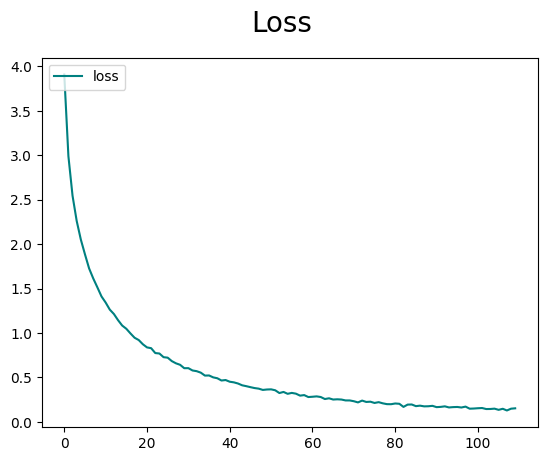

In [34]:
fig=plt.figure()
plt.plot(history_1.history['loss'],color='teal',label='loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

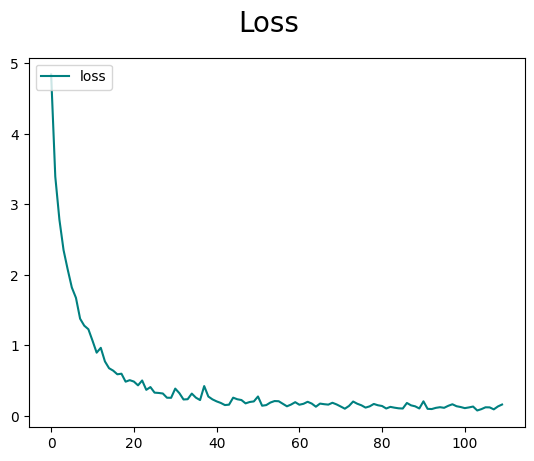

In [35]:
fig=plt.figure()
plt.plot(history_2.history['loss'],color='teal',label='loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

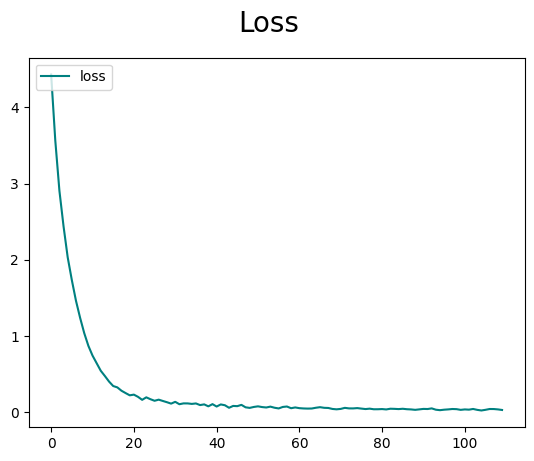

In [36]:
fig=plt.figure()
plt.plot(history_3.history['loss'],color='teal',label='loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

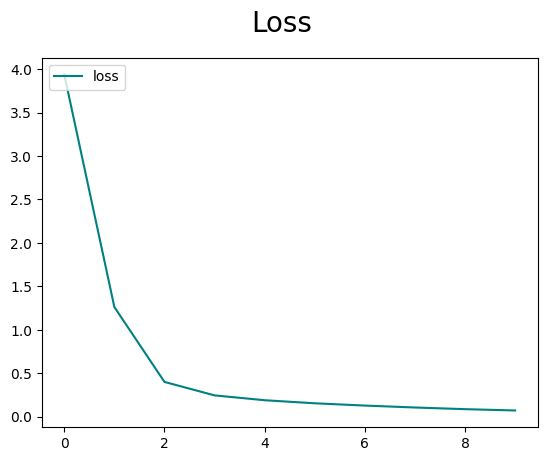

In [37]:
fig=plt.figure()
plt.plot(history_4.history['loss'],color='teal',label='loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [38]:
test_acc_mobilenetv2 = mobilenetv2_model.evaluate(test, verbose=0)[1]
test_acc_densenet121 = densenet121.evaluate(test, verbose=0)[1]
test_acc_efficientnet = efficientnet.evaluate(test, verbose=0)[1]
test_acc_meta_model = meta_model.evaluate(X_test_stacked, y_test_flattened, verbose=0)[1]

# Plot the accuracies


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
W0000 00:00:1720159205.307025      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
W0000 00:00:1720159364.508555      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720159380.570005      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [39]:
print(test_acc_mobilenetv2)

0.8199704885482788


In [40]:
print(test_acc_densenet121)

0.7215936779975891


In [41]:
print(test_acc_efficientnet)

0.8494835495948792


In [42]:
print(test_acc_meta_model)

0.822429895401001


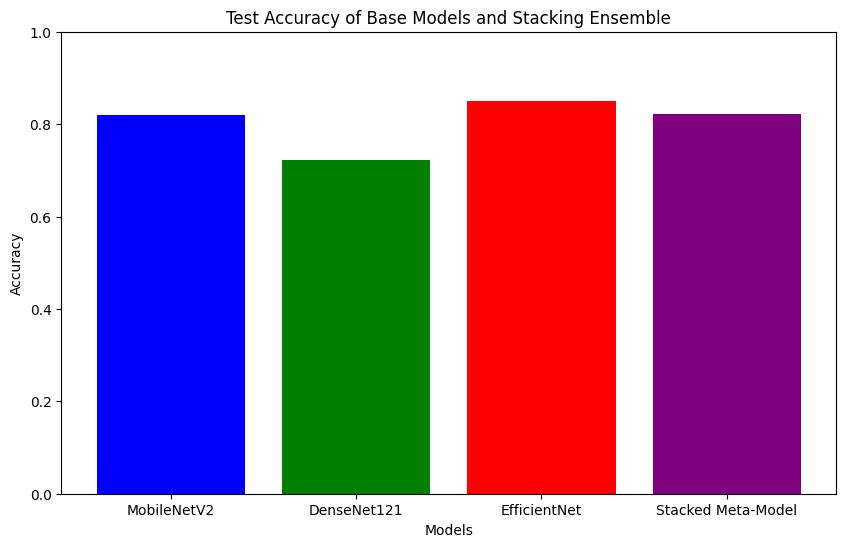

In [43]:
model_names = ['MobileNetV2', 'DenseNet121','EfficientNet', 'Stacked Meta-Model']
accuracies = [test_acc_mobilenetv2, test_acc_densenet121, test_acc_efficientnet,test_acc_meta_model]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red','purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of Base Models and Stacking Ensemble')
plt.ylim(0, 1)
plt.show()